# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [4]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [5]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [6]:
# Import the necessary CSVs to Pandas DataFrames

file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


- - -

In [7]:
! conda list panel

# packages in environment at C:\Users\12152\anaconda3\envs\pyvizenv:
#
# Name                    Version                   Build  Channel
panel                     0.12.1                     py_0    pyviz


## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [15]:
# Define Panel Visualization Functions
def housing_units_per_year():
    df_housing_units = sfo_data[["housing_units"]].groupby(sfo_data["year"]).mean()
    fig_housing_units = plt.figure()
    max_df = sfo_data["housing_units"].max()
    min_df = sfo_data["housing_units"].min()
    plot_housing_units = df_housing_units.plot.bar(ylim=[min_df-3500,max_df+4000])
    plt.close(fig_housing_units)
    
    return pn.pane.Matplotlib(fig_housing_units, tight=True)

def average_gross_rent():
    df_avg_costs = (
        sfo_data[["sale_price_sqr_foot", "gross_rent"]]
        .groupby(sfo_data.index)
        .mean()
    )
    
    fig_avg_gross_rent = plt.figure()
    plot_avg_gross_rent = df_avg_costs["gross_rent"].plot(color="red")
    plt.close(fig_avg_gross_rent)

    return pn.pane.Matplotlib(fig_avg_gross_rent, tight=True)

def average_sales_price():
    df_avg_costs = (
        sfo_data[["sale_price_sqr_foot", "gross_rent"]]
        .groupby(sfo_data.index)
        .mean()
    )    
    
    fig_avg_sale_price = plt.figure()
    plot_avg_sale_price = df_avg_costs["sale_price_sqr_foot"].plot(color="purple")
    plt.close(fig_avg_sale_price)

    return pn.pane.Matplotlib(fig_avg_sale_price, tight=True)


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    neighborhood = sfo_data.groupby([sfo_data.index,"neighborhood"]).mean()
    neighborhood.reset_index(inplace=True)
    return neighborhood.hvplot.line("year", "sale_price_sqr_foot", groupby="neighborhood")


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    top_most_expensive_neighborhoods = sfo_data.groupby(by='neighborhood').mean().sort_values(by='sale_price_sqr_foot',ascending=False).head(10)
    top_most_expensive_neighborhoods = top_most_expensive_neighborhoods.reset_index()
    return top_most_expensive_neighborhoods.hvplot.bar("neighborhood","sale_price_sqr_foot",rot=90)

def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    most_expensive_neighborhoods_rent_sales = sfo_data.groupby(by='neighborhood').mean().sort_values(by='sale_price_sqr_foot',ascending=False).head(10)
    #most_expensive_neighborhoods_rent_sales = top_most_expensive_neighborhoods.reset_index()
    return most_expensive_neighborhoods_rent_sales.hvplot.bar("year",["gross_rent","sale_price_sqr_foot"],groupby="neighborhood")
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""
    file_path_coord = Path("neighborhoods_coordinates.csv")
    sfo_data_coord = pd.read_csv(file_path_coord)

    sfo_data_coord = sfo_data_coord.groupby(by='Neighborhood').mean().reset_index()
    return sfo_data_coord


def parallel_categories():
    """Parallel Categories Plot."""
    a = px.set_mapbox_access_token(map_box_api)
  
    file_path_coord = Path("neighborhoods_coordinates.csv")
    sfo_data_coord = pd.read_csv(file_path_coord)
   
    map_plot = px.scatter_mapbox(
    sfo_data_coord,
    lat="Lat",
    lon="Lon",
    hover_name='Neighborhood',
    size="Lat",
    zoom=10,
    mapbox_style='open-street-map')
    return map_plot


def neighborhood_map():
    """Neighborhood Map."""
    file_path_coord = Path("neighborhoods_coordinates.csv")
    sfo_data_coord = pd.read_csv(file_path_coord)
    
    map_plot = px.scatter_mapbox(
    sfo_data_coord,
    lat="Lat",
    lon="Lon",
    hover_name='Neighborhood',
    size="Lat",
    zoom=10,
    mapbox_style='open-street-map')
    b = map_plot
    return b


def sunburst():
    """Sunburst Plot."""
    
    sunburst_plot = px.sunburst(df_expensive_neighborhoods_per_year, path=['year', 'neighborhood'],
                  color='gross_rent',
                  color_continuous_scale='rdbu',
                  color_continuous_midpoint=np.average(df_expensive_neighborhoods_per_year['gross_rent']))
    return sunburst_plot

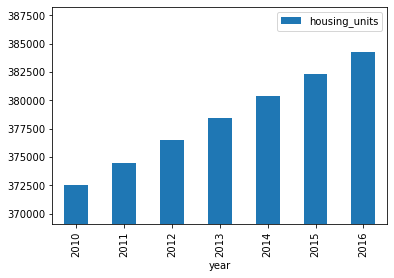

In [16]:
# Create a Title for the Dashboard

title = pn.pane.Markdown(
    """
    # SFO Rental Price and Sales Analysis from 2010 to 2016
    """,
    width=800,
)


welcome = pn.pane.Markdown(
    """
    This dashboard displays useful data analysis of San Fransicso
    historical sales and pricing data from 2010 to 2016. The interactive graphs present here will help you
    visual our analysis of historical prices of house units, sale price per square foot and gross rent. 
    To gain an insight on the developement of San Francisco's Real Estate Market
    please help your self by navigating through each tab within the dashboard.
    """
)


# Create a tab layout for the dashboard

tabs = pn.Tabs(
    ("Welcome", pn.Column(welcome, neighborhood_map())),
    ("Yearly Real Estate Market Analysis", pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())),
    ("Neighborhood Analysis", pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods())),
    ("Parallel Graphical Analysis", pn.Column(parallel_coordinates(), parallel_categories(), width=960),)
)



# Create the dashboard

panel = pn.Column(pn.Row(title), tabs, width=500)

## Serve the Panel Dashboard

Traceback (most recent call last):
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\pyviz_comms\__init__.py", line 325, in _handle_msg
 self._on_msg(msg)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\panel\viewable.py", line 273, in _on_msg
 doc.unhold()
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\bokeh\document\document.py", line 669, in unhold
 self._trigger_on_change(event)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\bokeh\document\document.py", line 1180, in _trigger_on_change
 self._with_self_as_curdoc(event.callback_invoker)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\bokeh\document\document.py", line 1198, in _with_self_as_curdoc
 return f()
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\bokeh\util\callback_manager.py", line 161, in invoke
 callback(attr, old, new)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\panel\reactive.py", line 301, in _comm_change
 self._process_events({attr: new})
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\panel\reactive.py", line 262, in _process_events
 self.param.set_param(**self_events)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 1904, in set_param
 return self_.update(kwargs)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 1877, in update
 self_._batch_call_watchers()
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 2038, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 2000, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 649, in caller
 return function()
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\param\parameterized.py", line 387, in _depends
 return func(*args, **kw)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\panel\pane\plotly.py", line 153, in _update_figure_layout
 self._figure.plotly_relayout(self.relayout_data)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\plotly\basedatatypes.py", line 2601, in plotly_relayout
 relayout_changes = self._perform_plotly_relayout(relayout_data)
 File "C:\Users\12152\anaconda3\envs\pyvizenv\lib\site-packages\plotly\basedatatypes.py", line 2641, in _perform_plotly_relayout
 key_path_str=key_path_str
ValueError: 
Invalid property path 'mapbox._derived' for layout

Column(width=500)
    [0] Row
        [0] Markdown(str, width=800)
    [1] Tabs
        [0] Column
            [0] Markdown(str)
            [1] Plotly(Figure)
        [1] Row
            [0] Matplotlib(Figure, tight=True)
            [1] Matplotlib(Figure, tight=True)
            [2] Matplotlib(Figure, tight=True)
        [2] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] HoloViews(Bars)
        [3] Column(width=960)
            [0] DataFrame(DataFrame)
            [1] Plotly(Figure, visible=False)
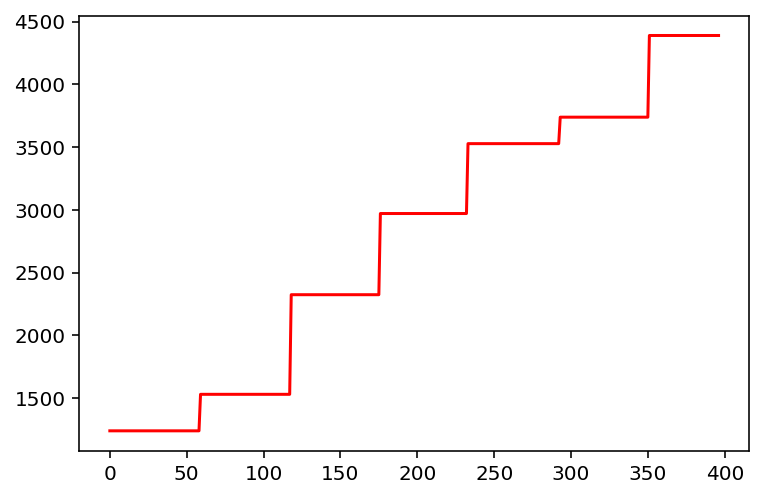
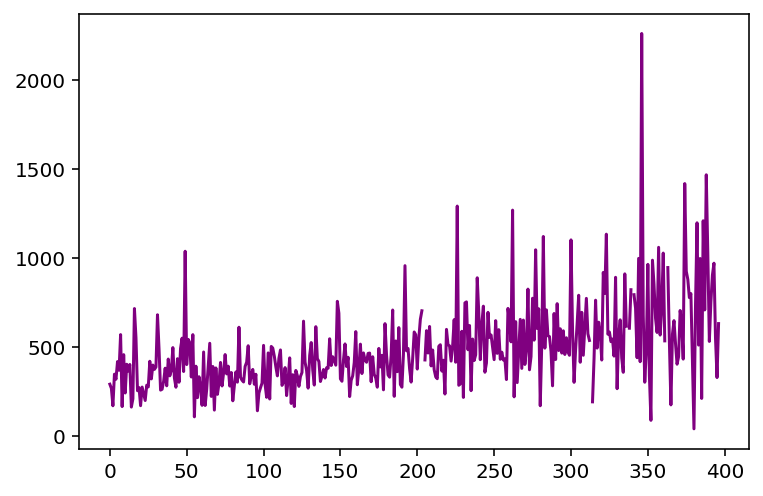
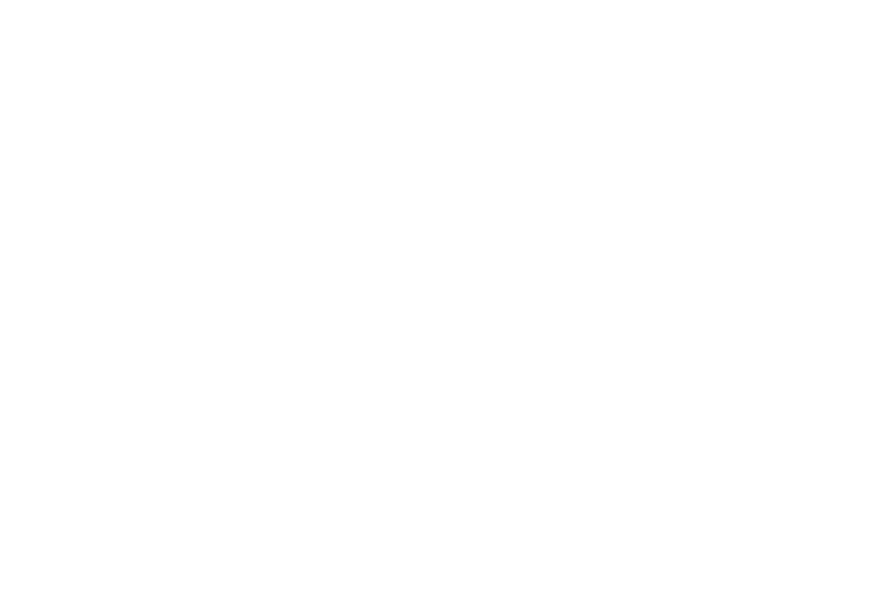

In [17]:
# Serve the# dashboard

panel.servable()

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

In [ ]:
# housing_units_per_year()

In [ ]:
# average_gross_rent()

In [ ]:
# average_sales_price()

In [ ]:
# average_price_by_neighborhood()

In [ ]:
# top_most_expensive_neighborhoods()

In [ ]:
# most_expensive_neighborhoods_rent_sales()

In [ ]:
# neighborhood_map().show()

In [ ]:
# parallel_categories()

In [ ]:
# parallel_coordinates()

In [ ]:
# sunburst()